In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv('D:/Project_DA/Nykaa_Product_Review/Nykaa_Product_Review.csv')

In [151]:
df.columns

Index(['Product Id', 'Product Brand Code', 'Retailer', 'Product Category',
       'Product Brand', 'Product Name', 'Product Price', 'Product Url',
       'Market', 'Product Description', 'Product Currency',
       'Product Image Url', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Expected Category Count',
       'Expected Brand Count'],
      dtype='object')

*DATA PREPROCESSING*

In [152]:
#creating a dataframe with the columns I need for the analysis
df_analysis = df.filter(['Product Brand Code','Retailer','Product Category','Product Brand','Product Name','Product Price','Product Currency','Product Rating','Product Reviews Count'], axis=1)

In [153]:
#removing the space in the column names so that it is easier to use it
column_names = ['Product_Brand_Code','Retailer','Product_Category','Product_Brand','Product_Name','Product_Price','Product_Currency','Product_Rating','Product_Reviews_Count']
df_analysis.columns = column_names

In [154]:
df_analysis.shape

(625, 9)

In [155]:
#Replacing 'BZ1000' and 'BH7936' with 'nykaa.com' from retailer column since BZ1000 and BH7936 seems to be misplaced
df_analysis['Retailer'].replace('BZ1000', 'nykaa.com', inplace= True)


C:\Users\NAYANIKA\AppData\Local\Temp\ipykernel_13540\2913407118.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_analysis['Retailer'].replace('BZ1000', 'nykaa.com', inplace= True)


In [156]:
df_analysis['Retailer'].replace('BH7936', 'nykaa.com', inplace= True)

C:\Users\NAYANIKA\AppData\Local\Temp\ipykernel_13540\1688150698.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_analysis['Retailer'].replace('BH7936', 'nykaa.com', inplace= True)


In [157]:
df_analysis.Retailer.unique()

array(['nykaa.com'], dtype=object)

In [158]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product_Brand_Code     625 non-null    object 
 1   Retailer               625 non-null    object 
 2   Product_Category       544 non-null    object 
 3   Product_Brand          625 non-null    object 
 4   Product_Name           625 non-null    object 
 5   Product_Price          625 non-null    object 
 6   Product_Currency       625 non-null    object 
 7   Product_Rating         556 non-null    object 
 8   Product_Reviews_Count  563 non-null    float64
dtypes: float64(1), object(8)
memory usage: 44.1+ KB


In [159]:
#from the info we can analyse that columns like 'Product_Price' and 'Product_Rating' data types should be changed 
df_analysis[['Product_Price', 'Product_Rating']] = df_analysis[['Product_Price', 'Product_Rating']].apply(lambda x: pd.to_numeric(x, errors = 'coerce'))
 # 'coerce' will handle the strings that cannot be converted into numeric, will be set as nan


In [160]:
#Handling duplicates
df_analysis.drop_duplicates(inplace= True)

In [161]:
#Product_Price, Product_Category, Rating and review count contains null , so have to deal with the missing values
df_analysis.dropna(inplace = True) # dropping the entire row if there is any null value since these are imp columns and having null in any of them may affect the results

In [162]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 624
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product_Brand_Code     482 non-null    object 
 1   Retailer               482 non-null    object 
 2   Product_Category       482 non-null    object 
 3   Product_Brand          482 non-null    object 
 4   Product_Name           482 non-null    object 
 5   Product_Price          482 non-null    float64
 6   Product_Currency       482 non-null    object 
 7   Product_Rating         482 non-null    float64
 8   Product_Reviews_Count  482 non-null    float64
dtypes: float64(3), object(6)
memory usage: 37.7+ KB


In [42]:
# to see how many rows are there that has only brand entries
#df_analysis[df_analysis['Product_Category'].str.contains("^Brand.*", na= False, regex = True)]

In [163]:
#taking only the category mentioned
df_analysis['Category'] = df_analysis['Product_Category'].str.split('>').str[0]

In [164]:
# after spliting removing the trail space
df_analysis['Category']= df_analysis['Category'].str.rstrip()

In [165]:
# asigning a proper name to the category name "Brand" 
df_analysis['Category'].replace("Brand", "Non-Categorized Brand Entries", inplace = True)

C:\Users\NAYANIKA\AppData\Local\Temp\ipykernel_13540\1571194401.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_analysis['Category'].replace("Brand", "Non-Categorized Brand Entries", inplace = True)


In [166]:
# asigning a informative name to the category name "NFBA2020" 
df_analysis['Category'].replace("NFBA 2020 Nominees Online Sale", "Award-Winning Products-NFBA 2020", inplace = True)

C:\Users\NAYANIKA\AppData\Local\Temp\ipykernel_13540\2670044330.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_analysis['Category'].replace("NFBA 2020 Nominees Online Sale", "Award-Winning Products-NFBA 2020", inplace = True)


**Exploratory Data Analysis**

In [171]:
df_analysis.columns

Index(['Product_Brand_Code', 'Retailer', 'Product_Category', 'Product_Brand',
       'Product_Name', 'Product_Price', 'Product_Currency', 'Product_Rating',
       'Product_Reviews_Count', 'Category'],
      dtype='object')

In [174]:
#Average Price of each category 
Avg_price_cat[['Category','Avg_Price']] = df_analysis.groupby('Category')['Product_Price'].mean().reset_index()
#Avg_price_cat.drop('Product_Price', axis=1, inplace = True)


In [175]:
category_counts = df_analysis['Category'].value_counts()
total= category_counts.sum()
percentage = (category_counts/total)*100

In [176]:
# if the precentage is below 5 the in the pie chart it will be exploded
threshold = 5
explode_values = [0.3 if pct< threshold else 0 for pct in percentage]

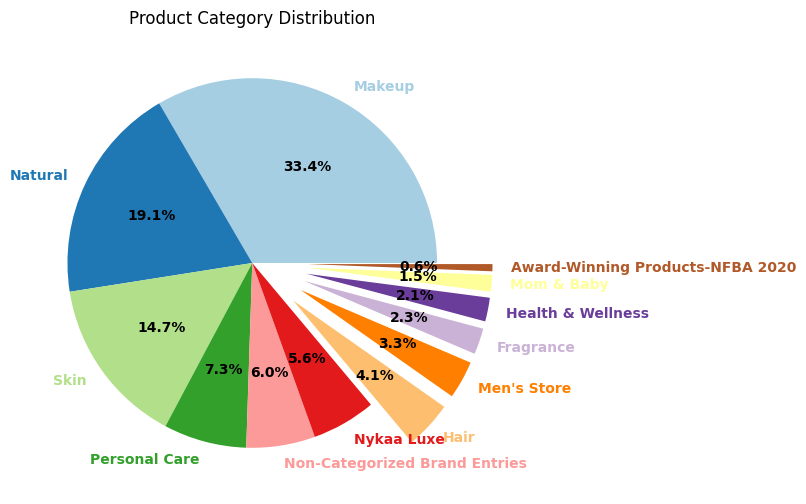

In [177]:
fig= plt.figure(figsize=(10,6))
colors = plt.cm.Paired.colors
wedges, texts, autotext =plt.pie(category_counts, labels=category_counts.index, autopct= '%1.1f%%', explode= explode_values, colors=colors, textprops = dict(fontweight = "bold"))
#category_counts.plot.pie(autopct= '%1.1f%%', explode= explode_values, colors=plt.cm.Paired.colors)
for i, text in enumerate(texts):
    text.set_color(colors[i])
plt.title('Product Category Distribution')
plt.ylabel('')
plt.show()

In [178]:
Avg_price_cat.sort_values(by="Avg_Price", ascending= False, inplace = True )

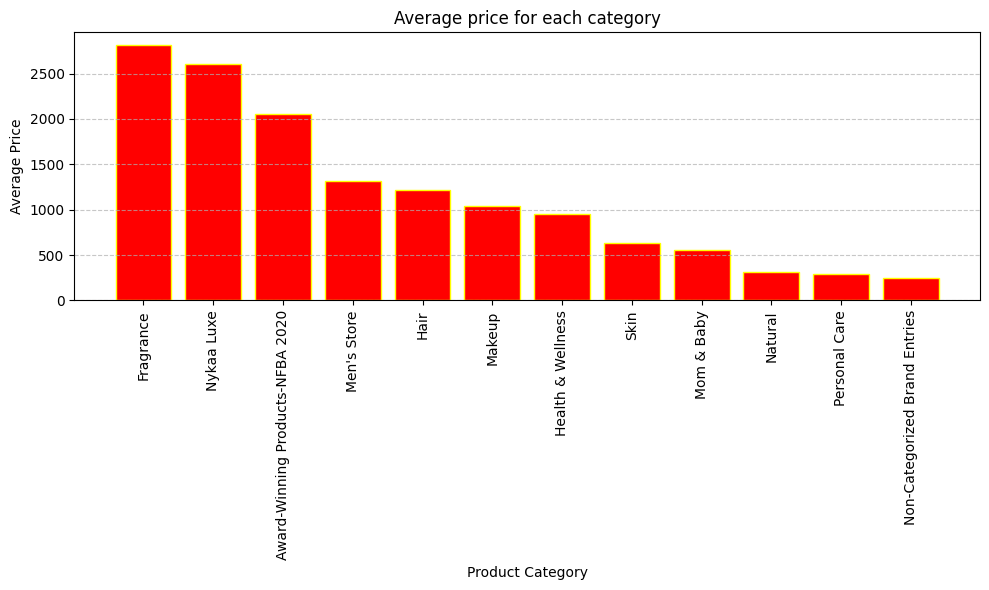

In [179]:
fig = plt.figure(figsize=(10,6))
plt.bar(Avg_price_cat['Category'], Avg_price_cat['Avg_Price'], width=0.8, color= 'red', edgecolor= 'yellow')
plt.title('Average price for each category')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(True, axis= 'y', linestyle='--', alpha= 0.7)
plt.tight_layout()
plt.show()

**TOP 10 COSTLIEST BRAND AND THEIR AVERAGE RATING**

In [187]:
df_analysis.columns

Index(['Product_Brand_Code', 'Retailer', 'Product_Category', 'Product_Brand',
       'Product_Name', 'Product_Price', 'Product_Currency', 'Product_Rating',
       'Product_Reviews_Count', 'Category'],
      dtype='object')

In [188]:
Brand_Analysis= df_analysis.groupby('Product_Brand').agg({'Product_Price': 'sum', 'Product_Rating': lambda x: round(x.mean(), 1), 'Product_Reviews_Count':lambda x: round(x.mean())}).reset_index()
Brand_Analysis.rename(columns = {'Product_Price':'Total_Price', 'Product_Rating': 'Avg_Rating'}, inplace= True)
Top10_costliest_brand=Brand_Analysis.sort_values(by='Total_Price', ascending= False).head(10)

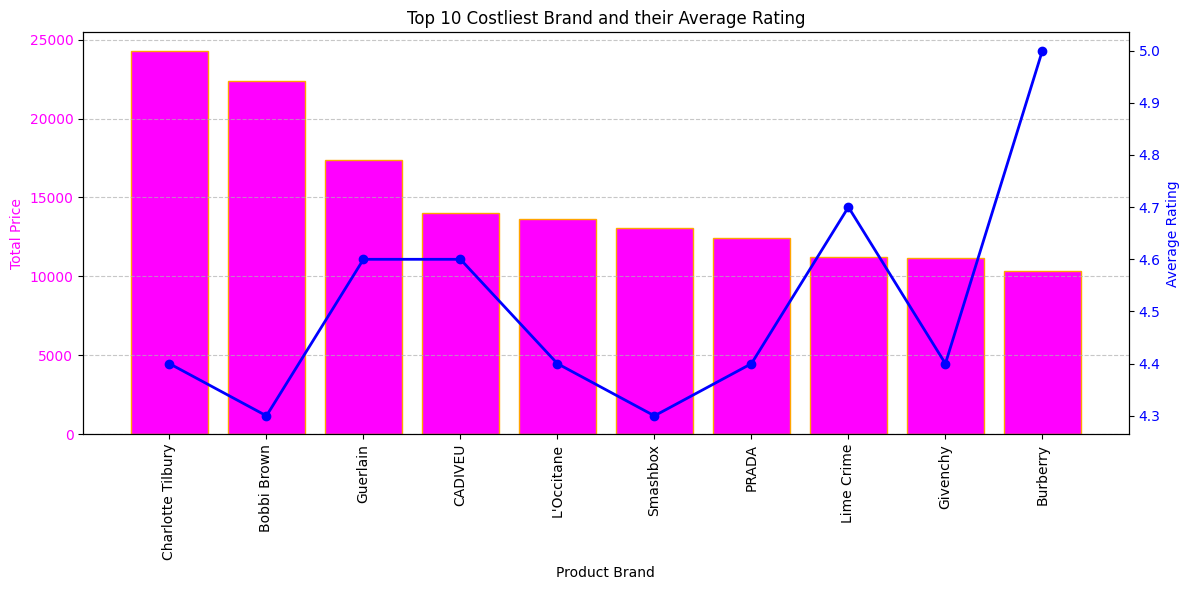

In [186]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the bar chart for Product Price
ax1.bar(Top10_costliest_brand['Product_Brand'], Top10_costliest_brand['Total_Price'], color='magenta', edgecolor='orange', linewidth=1, width=0.8)
ax1.set_xlabel('Product Brand')
ax1.set_ylabel('Total Price', color='magenta')
ax1.tick_params(axis='y', labelcolor='magenta')
ax1.set_xticks(Top10_costliest_brand['Product_Brand'])
ax1.set_xticklabels(Top10_costliest_brand['Product_Brand'], rotation=90)
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Creating a secondary y-axis for the Rating
ax2 = ax1.twinx()
ax2.plot(Top10_costliest_brand['Product_Brand'], Top10_costliest_brand['Avg_Rating'], color='blue', marker='o', linewidth=2)
ax2.set_ylabel('Average Rating', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Top 10 Costliest Brand and their Average Rating')
plt.tight_layout()
plt.show()

In [128]:
#Top10_costliest_brand.set_index('Product_Brand').plot(kind= 'bar')

**Highest Rated Brands and their Price**

In [182]:
Highest_rated_brand=Brand_Analysis.sort_values(['Avg_Rating', 'Total_Price'], ascending= False).head(10)

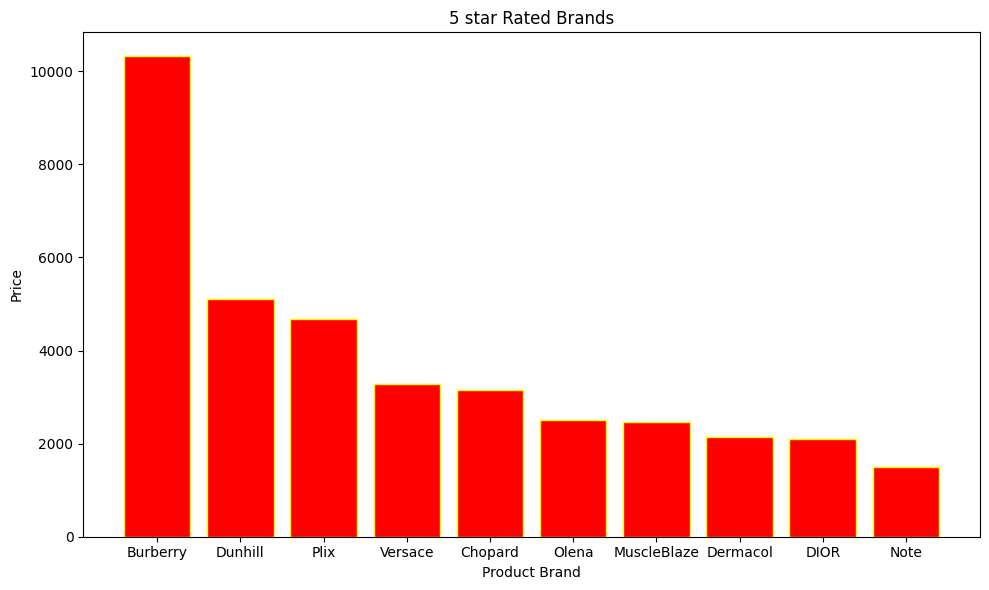

In [183]:
fig = plt.figure(figsize= (10,6))
plt.bar(Highest_rated_brand['Product_Brand'], Highest_rated_brand['Total_Price'], width=0.8, color= 'red', edgecolor= 'yellow')
plt.xlabel('Product Brand')
plt.ylabel('Price')
plt.title('5 star Rated Brands')
plt.tight_layout()
plt.show()



**Is there any Relation betwwen Price and Rating??**

In [193]:
Brand_Analysis[['Total_Price', 'Avg_Rating', 'Product_Reviews_Count']].corr()

,Total_Price,Avg_Rating,Product_Reviews_Count
Total_Price,1.000000,0.135464,0.011916
Avg_Rating,0.135464,1.000000,0.033559
Product_Reviews_Count,0.011916,0.033559,1.000000


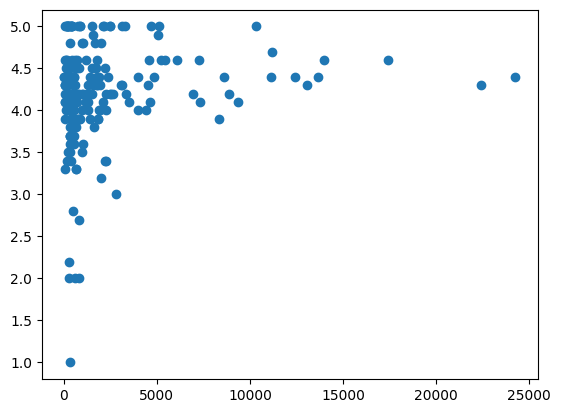

In [185]:
plt.scatter(Brand_Analysis['Total_Price'], Brand_Analysis['Avg_Rating'])
plt.show()

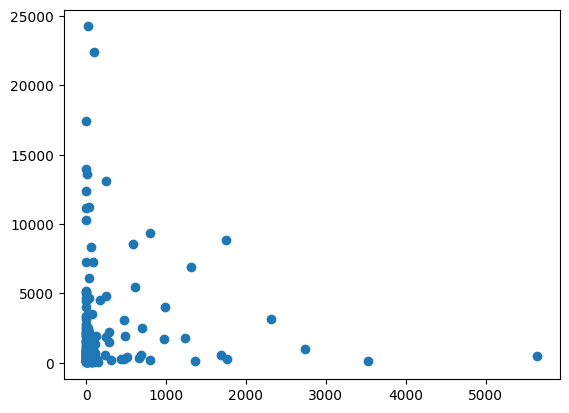

In [192]:
plt.scatter(Brand_Analysis['Product_Reviews_Count'], Brand_Analysis['Total_Price'])
plt.show()